In [16]:
import numpy as np; import matplotlib.pyplot as plt; import pandas as pd; import seaborn as sns
sns.set_theme(font_scale=2)

In [34]:
def csvToDf(filename):
    """ returns a pandas dataframe  

    Args:
        filename (_string_): csv-file with energy and magnetization for each cycle
    """
    df = pd.read_csv(filename)
    T = df.temperature.to_numpy()[0]
    L = df.gridsize.to_numpy()[0]
    energy = df.energy
    mag = df.magnetization
    cycles = np.arange(0, len(energy))
    energy1mom = np.cumsum(energy)/(cycles + 1)
    energy2mom = np.cumsum(energy**2)/(cycles + 1)
    heatCapacity = 1/(L**2*T**T)*(energy2mom - energy1mom**2)
    mag1mom = np.cumsum(abs(mag))/(cycles + 1)
    mag2mom = np.cumsum(mag**2)/(cycles + 1)
    susceptibility = 1/(L**2*T)*(mag2mom - mag1mom**2)
    df['energy1mom'] = energy1mom
    df['energy2mom'] = energy2mom
    df['magnetization1mom'] = mag1mom
    df['magnetization2mom'] = mag2mom
    df['heatCapacity'] = heatCapacity
    df['susceptibility'] = susceptibility
    
    return df

    

## Problem 4

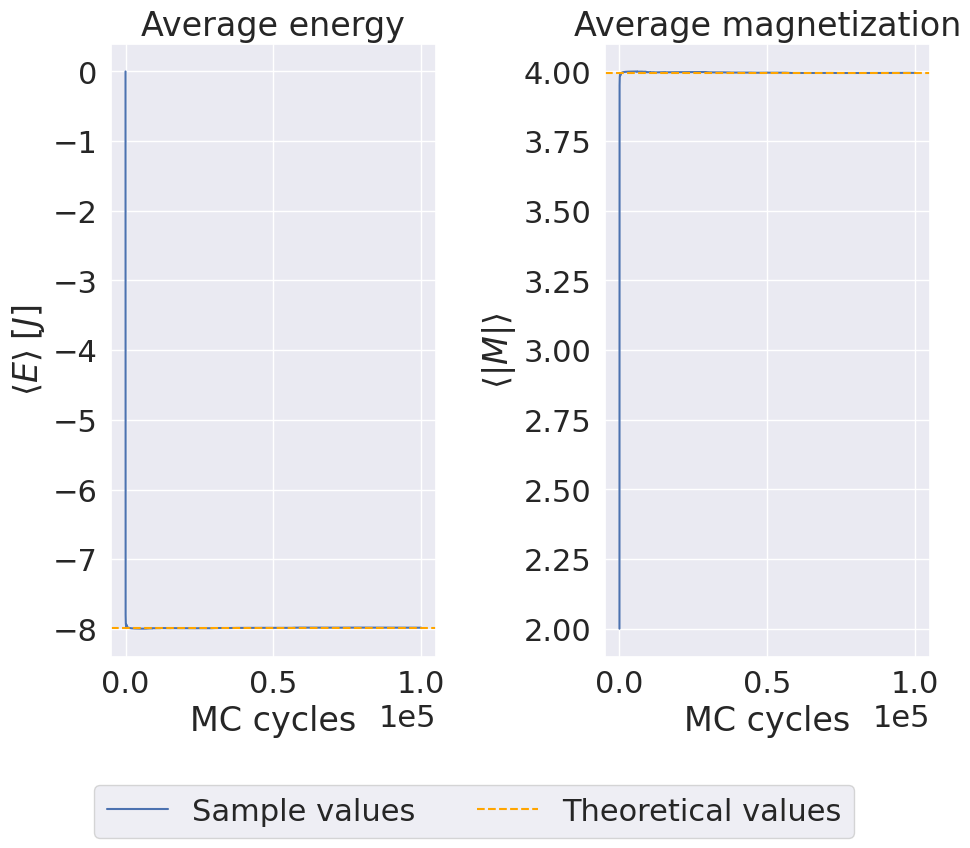

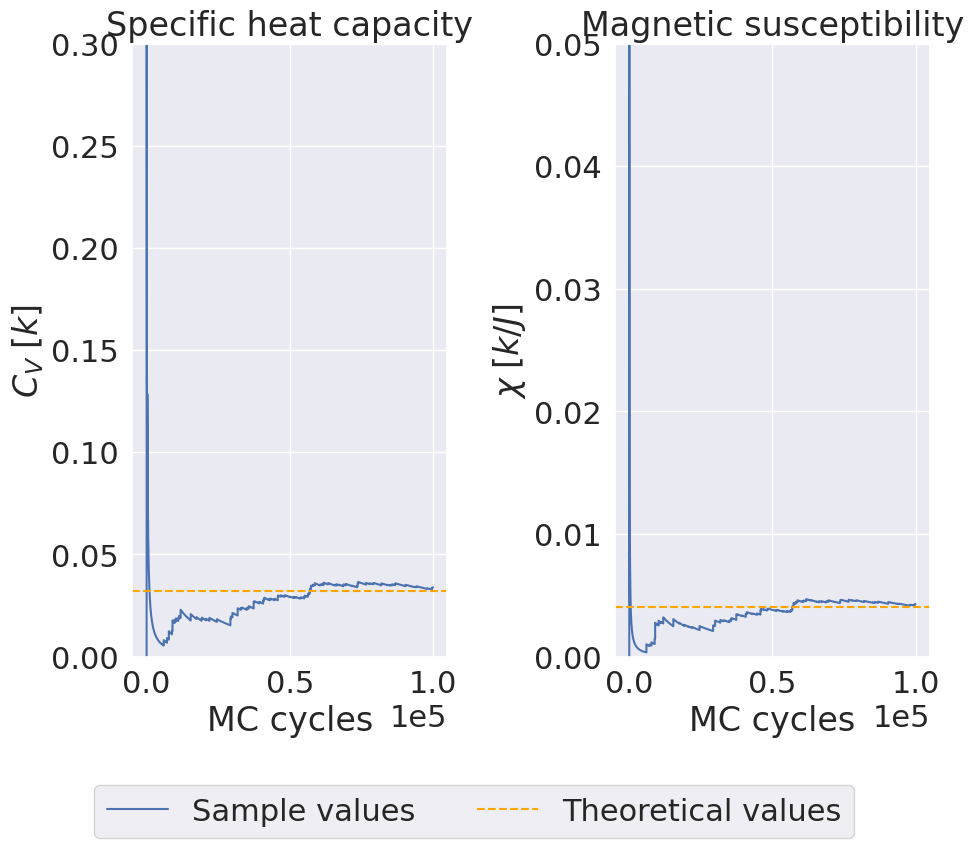

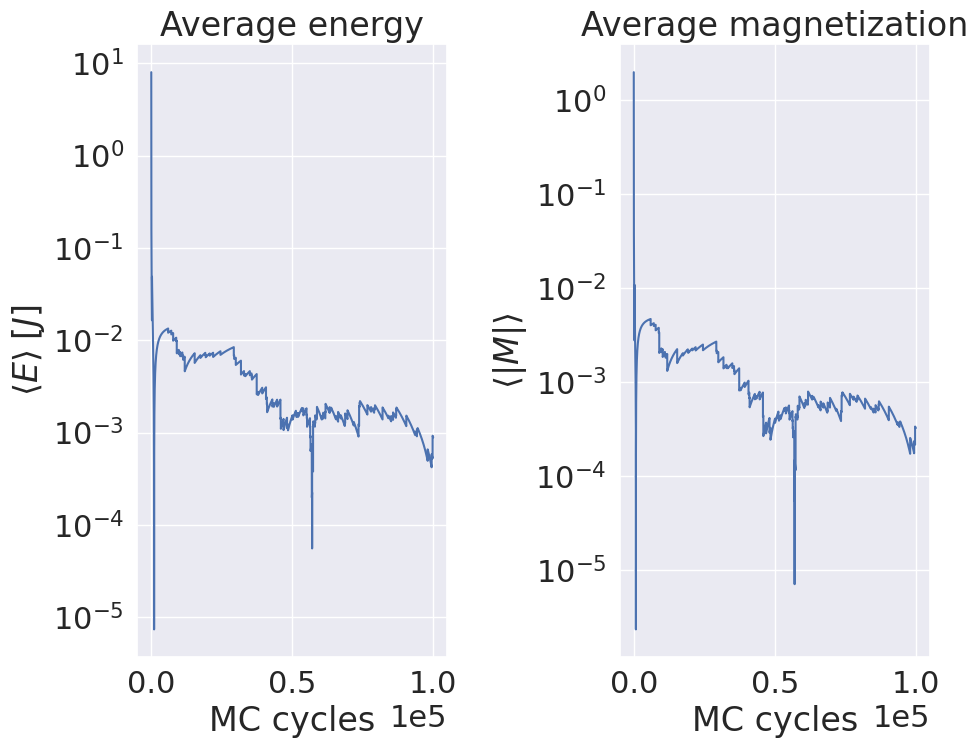

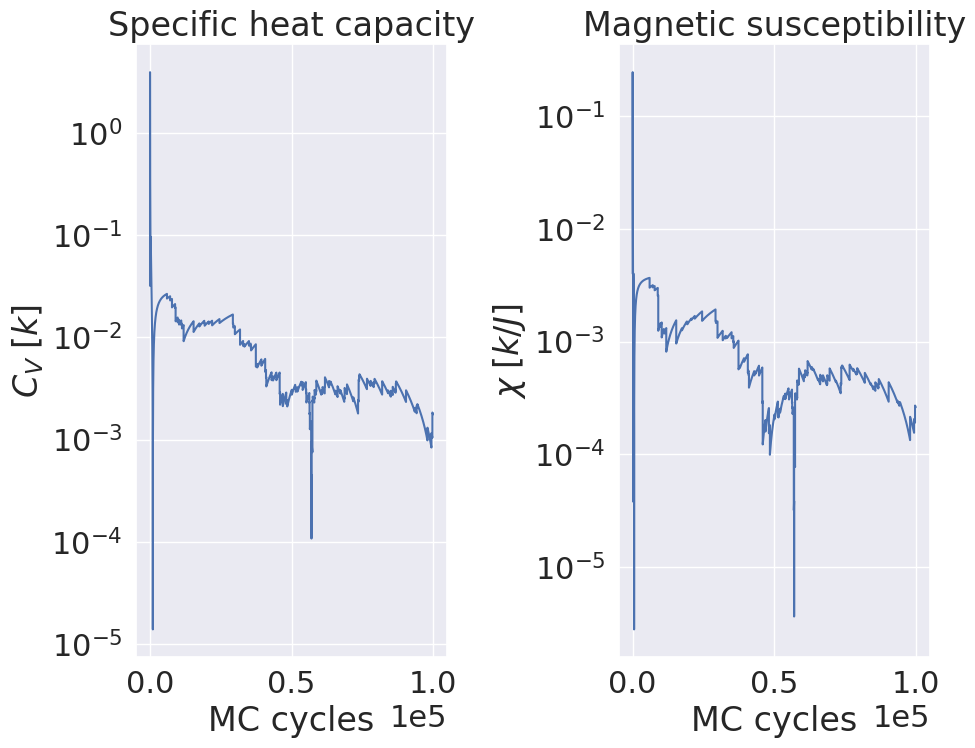

In [40]:
validation2x2 = csvToDf('validation2x2.csv')
T = np.mean(validation2x2.temperature)
beta = 1/T
Z = 12 + + 4*np.cosh(8*beta)
avgEng = -32*np.sinh(8*beta)/Z
engMom2 = 256*np.cosh(8*beta)/Z
avgM = (16 + 8*np.exp(8*beta))/Z
mMom2 = (32 + 32*np.exp(8*beta))/Z
cV = 64/(T**2)*(1/Z*np.cosh(8*beta) - 4/Z**2*np.sinh(8*beta)**2)
chi = 8*beta*((1 + np.exp(8*beta))/Z - 2*(2 + np.exp(8*beta))**2/Z**2 )


cycles = np.arange(0, len(validation2x2))
fig, axs = plt.subplots(1, 2, figsize = (10, 8))
axs[0].plot(cycles, validation2x2.energy1mom, label = 'Sample values')
axs[0].axhline(avgEng, linestyle = '--', label = 'Theoretical values', color = 'orange')
axs[0].set_xlabel('MC cycles')
axs[0].set_ylabel(r'$\langle E \rangle\; [J]$')
axs[0].set_title('Average energy')


axs[1].plot(cycles, validation2x2.magnetization1mom)
axs[1].axhline(avgM, linestyle = '--', color = 'orange')
axs[1].set_xlabel('MC cycles')
axs[1].set_ylabel(r'$\langle |M| \rangle$')
axs[1].set_title('Average magnetization')
lgd = fig.legend(loc = 'lower center', ncol = 2, fancybox = True, 
        bbox_to_anchor = (0.5, -0.1))
axs[0].ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))
axs[1].ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))

fig.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 2, figsize = (10, 8))
axs[0].plot(cycles, validation2x2.heatCapacity)
axs[0].axhline(cV, linestyle = '--', color = 'orange')
axs[0].set_xlabel('MC cycles')
axs[0].set_ylabel(r'$C_V\; [k]$')
axs[0].set_ylim([0, 0.3])
axs[0].set_title('Specific heat capacity')

axs[1].plot(cycles, validation2x2.susceptibility, label = 'Sample values')
axs[1].axhline(chi, linestyle = '--', color = 'orange', label = 'Theoretical values')
axs[1].set_xlabel('MC cycles')
axs[1].set_ylabel(r'$\chi\; [k/J]$')
axs[1].set_title('Magnetic susceptibility')
axs[1].set_ylim([0, 0.05])
lgd = fig.legend(loc = 'lower center', ncol = 2, fancybox = True, 
        bbox_to_anchor = (0.5, -0.1))
axs[0].ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))
axs[1].ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))

fig.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 2, figsize = (10, 8))
axs[0].semilogy(cycles, abs(validation2x2.energy1mom - avgEng))
axs[0].set_xlabel('MC cycles')
axs[0].set_ylabel(r'$\langle E \rangle\; [J]$')
axs[0].set_title('Average energy')


axs[1].semilogy(cycles, abs(validation2x2.magnetization1mom - avgM))
axs[1].set_xlabel('MC cycles')
axs[1].set_ylabel(r'$\langle |M| \rangle$')
axs[1].set_title('Average magnetization')

axs[0].ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))
axs[1].ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))

fig.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 2, figsize = (10, 8))
axs[0].semilogy(cycles, abs(validation2x2.heatCapacity - cV))
axs[0].set_xlabel('MC cycles')
axs[0].set_ylabel(r'$C_V\; [k]$')
axs[0].set_title('Specific heat capacity')

axs[1].semilogy(cycles, abs(validation2x2.susceptibility - chi))
axs[1].set_xlabel('MC cycles')
axs[1].set_ylabel(r'$\chi\; [k/J]$')
axs[1].set_title('Magnetic susceptibility')

axs[0].ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))
axs[1].ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))

fig.tight_layout()
plt.show()



## Problem 5

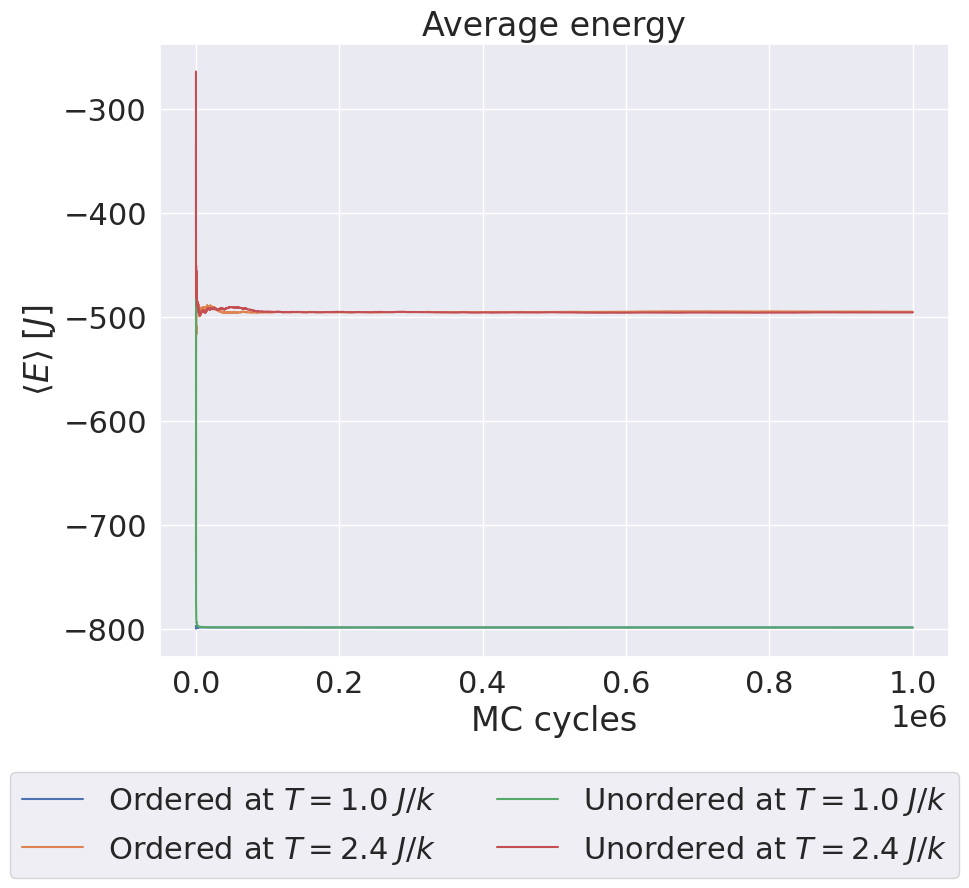

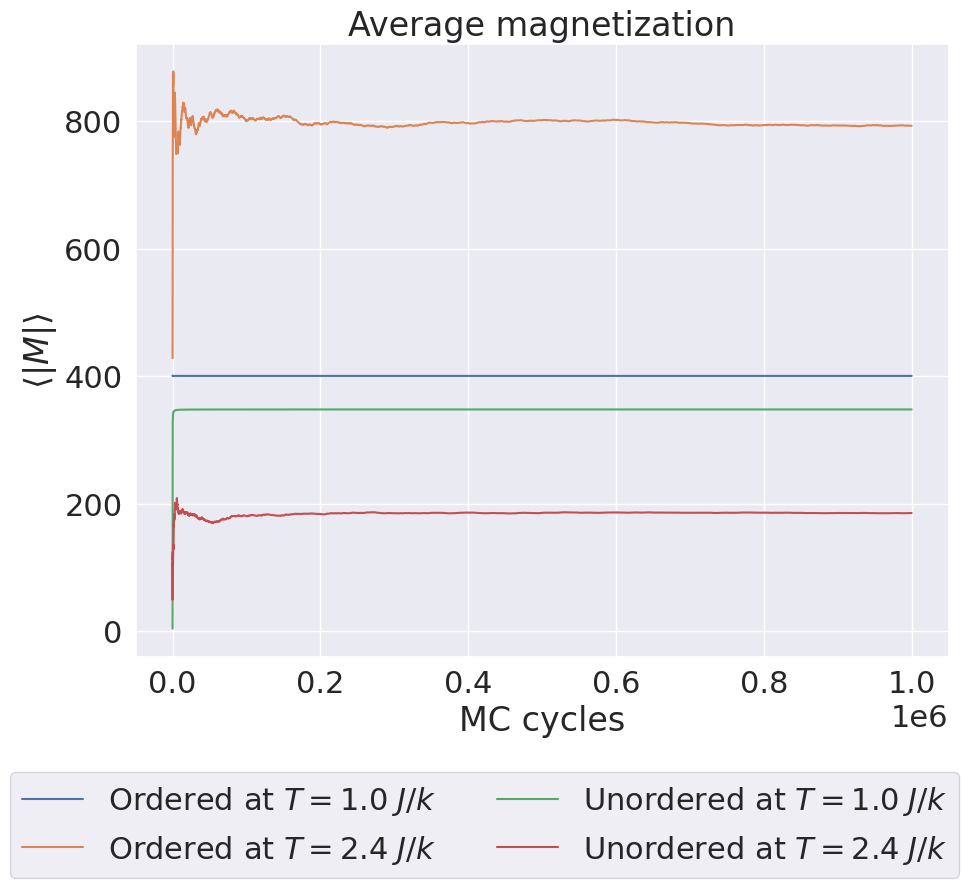

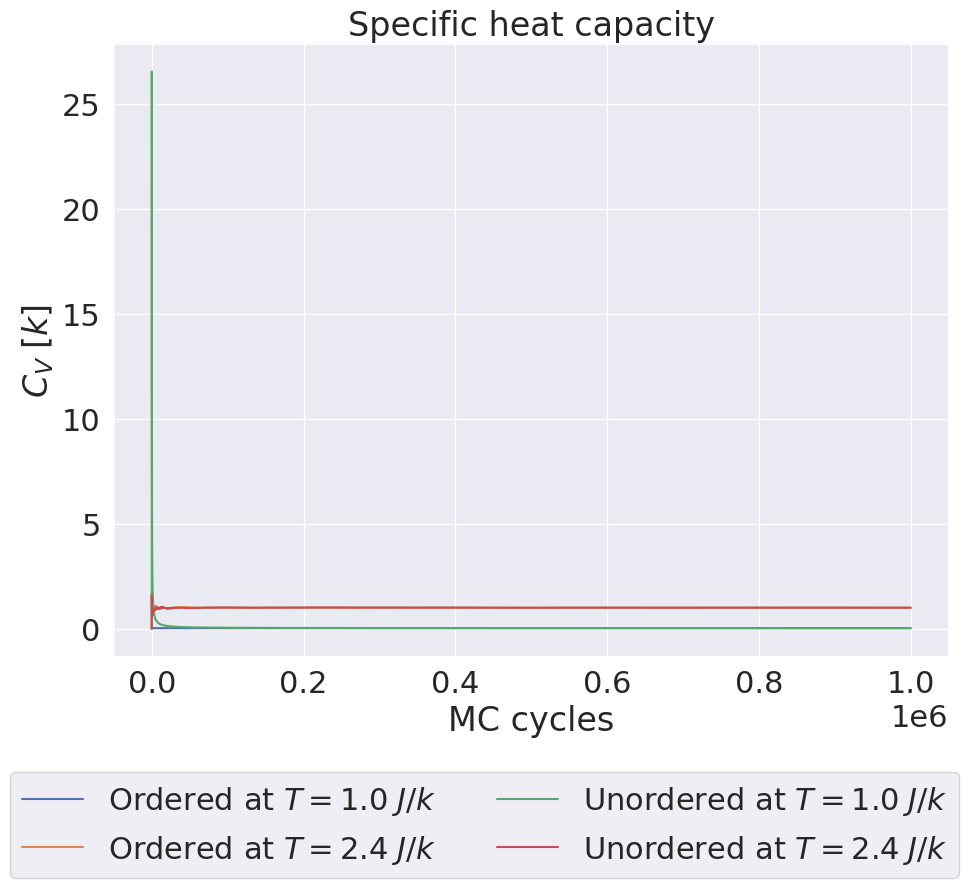

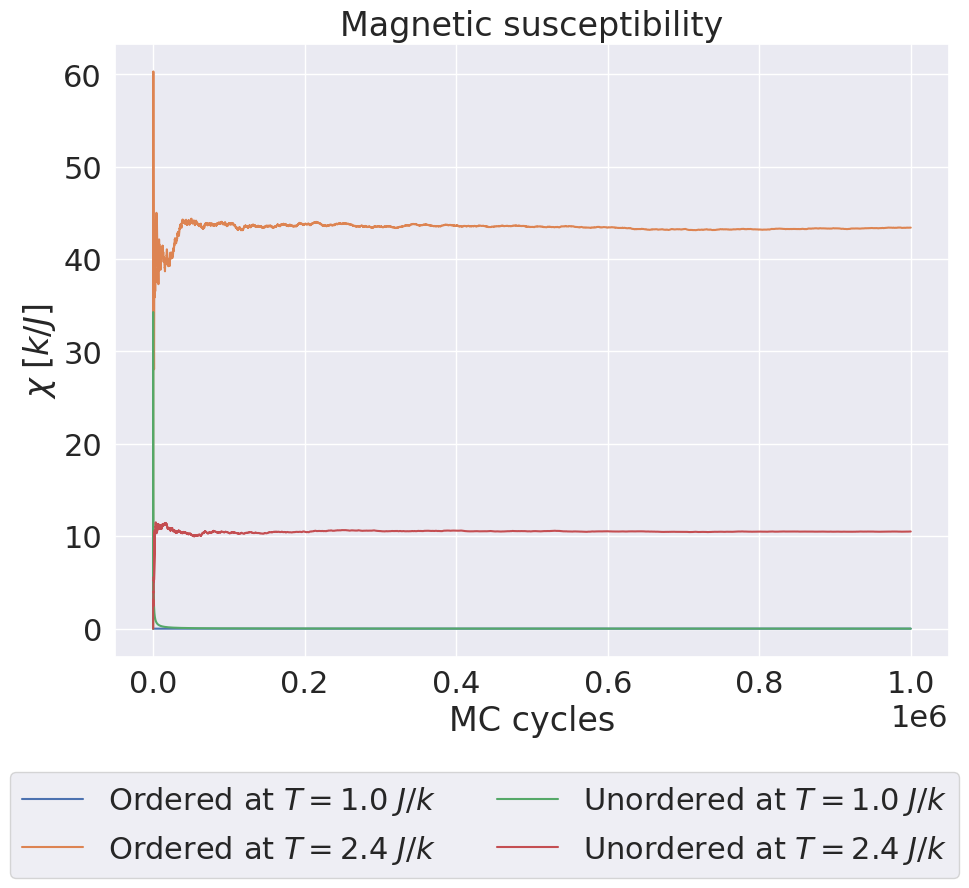

In [47]:
fig1, axs1 = plt.subplots(1, 1, figsize = (10, 8))
fig2, axs2 = plt.subplots(1, 1, figsize = (10, 8))
fig3, axs3 = plt.subplots(1, 1, figsize = (10, 8))
fig4, axs4 = plt.subplots(1, 1, figsize = (10, 8))
filenames = ['ordered1.csv', 'ordered2.csv', 'unordered1.csv', 'unordered2.csv']
names = [r'Ordered at $T = 1.0\; J/k$', r'Ordered at $T = 2.4\; J/k$', r'Unordered at $T = 1.0\; J/k$', r'Unordered at $T = 2.4\; J/k$']
for filename, name in zip(filenames, names):
    df = csvToDf(filename)
    cycles = np.arange(0, len(df))
    
    axs1.plot(cycles, df.energy1mom, label = name)
    axs1.set_xlabel('MC cycles')
    axs1.set_ylabel(r'$\langle E \rangle\; [J]$')
    axs1.set_title('Average energy')
    
    axs2.plot(cycles, df.magnetization1mom, label = name)
    axs2.set_xlabel('MC cycles')
    axs2.set_ylabel(r'$\langle |M| \rangle$')
    axs2.set_title('Average magnetization')
    
    axs3.plot(cycles, df.heatCapacity, label = name)
    axs3.set_xlabel('MC cycles')
    axs3.set_ylabel(r'$C_V\; [k]$')
    axs3.set_title('Specific heat capacity')
    
    axs4.plot(cycles, df.susceptibility, label = name)
    axs4.set_xlabel('MC cycles')
    axs4.set_ylabel(r'$\chi\; [k/J]$')
    axs4.set_title('Magnetic susceptibility')
    
lgd = fig1.legend(loc = 'lower center', ncol = 2, fancybox = True, 
            bbox_to_anchor = (0.5, -0.15))
lgd = fig2.legend(loc = 'lower center', ncol = 2, fancybox = True, 
            bbox_to_anchor = (0.5, -0.15))
lgd = fig3.legend(loc = 'lower center', ncol = 2, fancybox = True, 
            bbox_to_anchor = (0.5, -0.15))
lgd = fig4.legend(loc = 'lower center', ncol = 2, fancybox = True, 
            bbox_to_anchor = (0.5, -0.15))
axs1.ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))
axs2.ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))
axs3.ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))
axs4.ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))

fig1.tight_layout()
fig2.tight_layout()
fig3.tight_layout()
fig4.tight_layout()
plt.show()


In [42]:
df

,energy,magnetization,temperature,gridsize,energy1mom,energy2mom,magnetization1mom,magnetization2mom,heatCapacity,susceptibility
0,-264.0,106.0,2.4,20.0,-264.000000,69696.000000,106.000000,11236.000000,0.000000,0.000000
1,-284.0,70.0,2.4,20.0,-274.000000,75176.000000,88.000000,8068.000000,0.030580,0.337500
2,-340.0,58.0,2.4,20.0,-296.000000,88650.666667,78.000000,6500.000000,0.316398,0.433333
3,-356.0,52.0,2.4,20.0,-311.000000,98172.000000,71.500000,5551.000000,0.443711,0.457031
4,-372.0,20.0,2.4,20.0,-323.200000,106214.400000,61.200000,4520.800000,0.537028,0.807667
...,...,...,...,...,...,...,...,...,...,...
999995,-636.0,378.0,2.4,20.0,-495.806443,249100.551138,185.258683,44416.853047,1.001950,10.516743
999996,-596.0,374.0,2.4,20.0,-495.806543,249100.657254,185.258872,44416.948507,1.001952,10.516770
999997,-616.0,370.0,2.4,20.0,-495.806664,249100.787610,185.259057,44417.040990,1.001956,10.516795
999998,-584.0,350.0,2.4,20.0,-495.806752,249100.879565,185.259221,44417.119073,1.001957,10.516813


## Problem 6

In [46]:
df1 = csvToDf('unordered1.csv') # At T = 1.0
df2 = csvToDf('unordered2.csv') # At T = 2.4

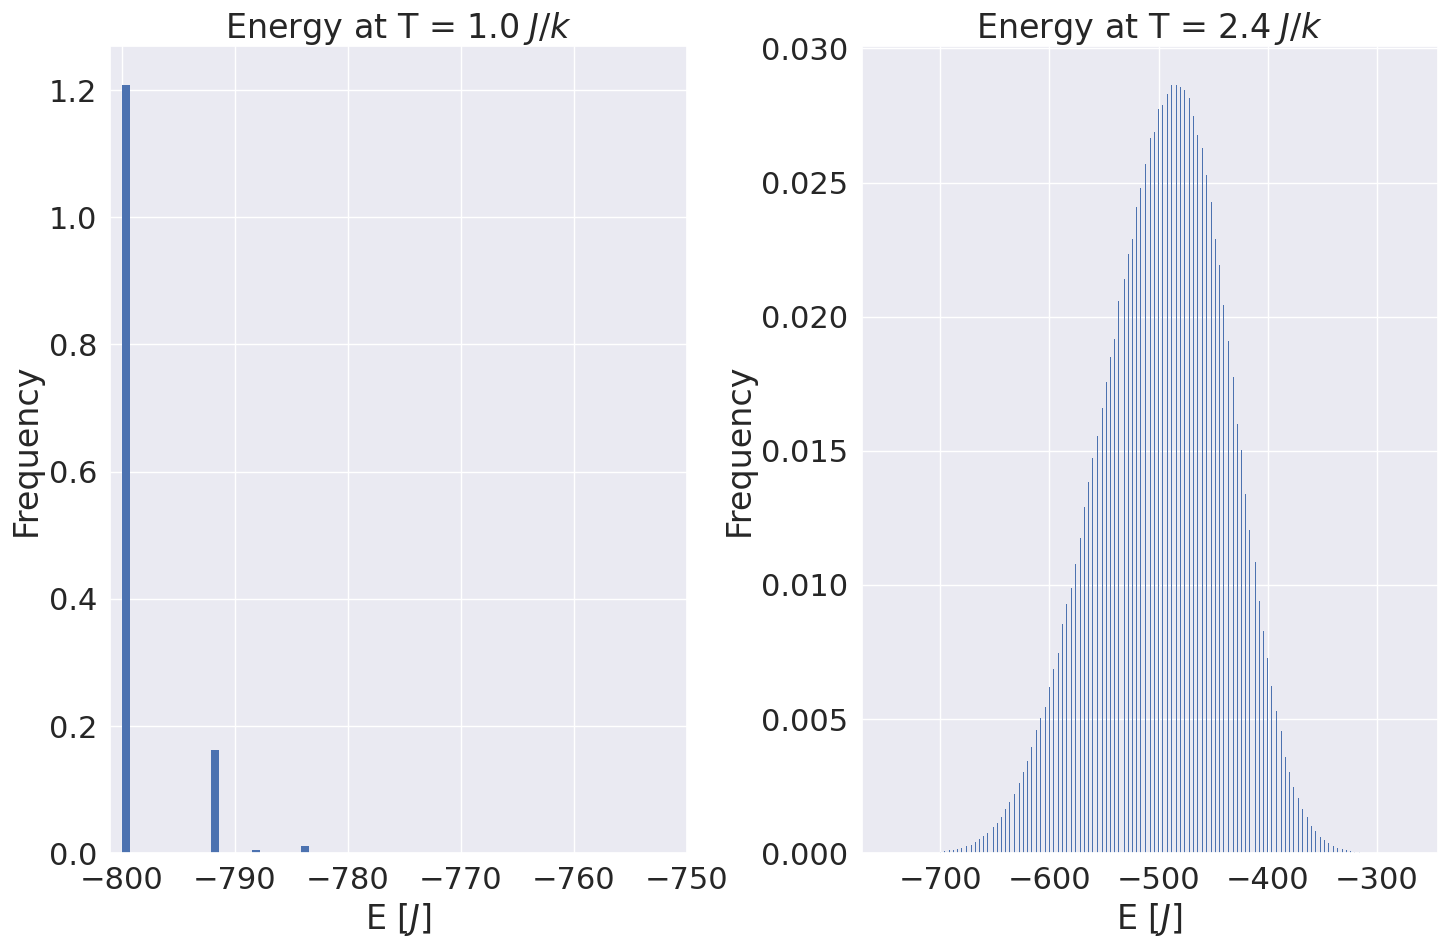

In [38]:
burnInindex = int(0.02*len(df1))
energy1 = df1.energy[burnInindex:]
energy2 = df2.energy[burnInindex:]
fig, axs = plt.subplots(1, 2, figsize = (15, 10))
axs[0].hist(energy1, bins = 50, density = True, edgecolor = 'None')
axs[1].hist(energy2, bins = 500, density = True, edgecolor = 'None')
axs[0].set_xlabel(r'E $[J]$')
axs[0].set_xlim([-801, -750])
axs[1].set_xlabel(r'E $[J]$')
axs[0].set_ylabel('Frequency')
axs[1].set_ylabel('Frequency')
axs[0].set_title(r'Energy at T = $1.0\; J/k$')
axs[1].set_title(r'Energy at T = $2.4\; J/k$')
fig.tight_layout()
plt.show()

In [39]:
df1

,energy,magnetization,temperature,gridsize,energy1mom,energy2mom,magnetization1mom,magnetization2mom,heatCapacity,susceptibility
0,-332.0,4.0,1.0,20.0,-332.000000,110224.000000,4.000000,16.000000,0.000000,0.000000
1,-444.0,12.0,1.0,20.0,-388.000000,153680.000000,8.000000,80.000000,7.840000,0.040000
2,-520.0,48.0,1.0,20.0,-432.000000,192586.666667,21.333333,821.333333,14.906667,0.915556
3,-584.0,64.0,1.0,20.0,-470.000000,229704.000000,32.000000,1640.000000,22.010000,1.540000
4,-596.0,52.0,1.0,20.0,-495.200000,254806.400000,36.000000,1852.800000,23.958400,1.392000
...,...,...,...,...,...,...,...,...,...,...
999995,-800.0,348.0,1.0,20.0,-798.859667,638186.992940,347.705235,120900.727451,0.025562,0.004493
999996,-800.0,348.0,1.0,20.0,-798.859669,638186.994753,347.705235,120900.727654,0.025562,0.004493
999997,-800.0,348.0,1.0,20.0,-798.859670,638186.996566,347.705235,120900.727857,0.025562,0.004493
999998,-800.0,348.0,1.0,20.0,-798.859671,638186.998379,347.705236,120900.728061,0.025562,0.004493


In [10]:
df1

,energy,energy1mom,energy2mom,magnetization,magnetization1mom,magnetization2mom,heatCapacity,susceptibility,temperature,gridsize
0,-296.0,-296.000000,87616.00000,-34.0,34.000000,1156.000000,0.000000,0.000000,1.0,20.0
1,-424.0,-360.000000,133696.00000,-76.0,55.000000,3466.000000,10.240000,1.102500,1.0,20.0
2,-464.0,-394.666667,160896.00000,-114.0,74.666667,6642.666667,12.835556,2.668889,1.0,20.0
3,-532.0,-429.000000,191428.00000,-146.0,92.500000,10311.000000,18.467500,4.386875,1.0,20.0
4,-552.0,-453.600000,214083.20000,-140.0,102.000000,12168.800000,20.825600,4.412000,1.0,20.0
...,...,...,...,...,...,...,...,...,...,...
999995,-800.0,-798.786447,638076.98580,400.0,399.494556,159661.932410,0.042994,0.165080,1.0,20.0
999996,-800.0,-798.786448,638076.98772,400.0,399.494556,159661.932750,0.042994,0.165080,1.0,20.0
999997,-792.0,-798.786442,638076.97691,398.0,399.494555,159661.931490,0.042994,0.165080,1.0,20.0
999998,-792.0,-798.786435,638076.96609,398.0,399.494553,159661.930230,0.042994,0.165080,1.0,20.0
